# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Eli Jose Abi Ghosn </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from numpy import arange

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [7]:
df.loc[(df.Latitude<0), 'Hemisferio'] = 'Sul'
df.loc[(df.Latitude>=0), 'Hemisferio'] = 'Norte'


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

Frequências relativas:
[0, 0.8)       0.0
[0.8, 1.6)     0.0
[1.6, 2.4)     0.0
[2.4, 3.2)     0.0
[3.2, 4)       0.0
[4, 4.8)       0.0
[4.8, 5.6)    37.0
[5.6, 6.4)    50.7
[6.4, 7.2)    10.4
[7.2, 8)       1.7
[8, 8.8)       0.2
[8.8, 9.6)     0.0
Name: Magnitude, dtype: float64 



[0, 10, 0, 0.8]

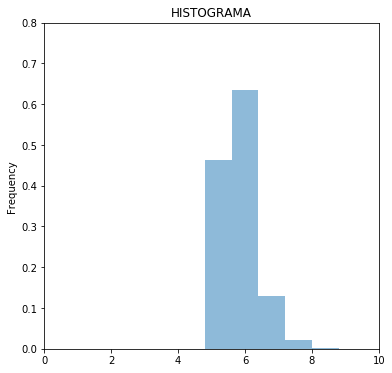

In [11]:
df.Magnitude.describe()
faixa = arange(0,10,0.8)

m = pd.cut(df.Magnitude, bins=faixa, right=False)
print('Frequências relativas:')
ut1 = (m.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')

plot = df.Magnitude.plot.hist(bins=faixa,title='HISTOGRAMA',figsize=(6, 6), normed=1, alpha=0.5)
plt.axis([0,10,0,0.8])

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [71]:
mu, sigma = stats.expon.fit(df['Magnitude'])
print('mu=', mu, '\n')
print('sigma=', sigma)

NameError: name 'stats' is not defined

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [12]:
ct = pd.crosstab(df.Hemisferio, df.Type, margins=True, rownames=['Hemisferio'], colnames=['Tipo'], normalize=True)*100
ct

Tipo,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,44.716385,0.008543,0.627883,0.000000,45.352811
Sul,54.514779,0.008543,0.119597,0.004271,54.647189
All,99.231164,0.017085,0.747480,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [53]:
ut = (df.Type.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut, '\n')

ut2 = (df.Hemisferio.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut2)




Rock Burst            0.0
Explosion             0.0
Earthquake           99.2
Nuclear Explosion     0.7
Name: Type, dtype: float64 

Norte    45.4
Sul      54.6
Name: Hemisferio, dtype: float64


Explique o seu raciocínio

Primeiro, é preciso pegar a probabilidade de um terremoto ocorrer depois coletamos a probabilidade de um abalo ocorrer no hemisferio norte. Entao, multiplicamos ambas para conseguir a probabilidade de um terremoto ocorrer no hemisferio norte.

A probabilidade é de 45,036% 

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [46]:
ct = pd.crosstab(df.Hemisferio, df.Type, margins=True, rownames=['Hemisferio'], colnames=['Tipo'], normalize='index')*100
print(ct, '\n')
print('Como é possível ver na tabela cruzada a frequência de explosões nucleares relativa ao total de abalos no norte é de 1,3844%. Portanto, a probabilidade pedida é de 1,38%')

Tipo        Earthquake  Explosion  Nuclear Explosion  Rock Burst
Hemisferio                                                      
Norte        98.596723   0.018836           1.384442    0.000000
Sul          99.757699   0.015632           0.218853    0.007816
All          99.231164   0.017085           0.747480    0.004271 

Como é possível ver na tabela cruzada a frequência de explosões nucleares relativa ao total de abalos no norte é de 1,38%. Portanto, a probabilidade pedida é de 1,38%


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

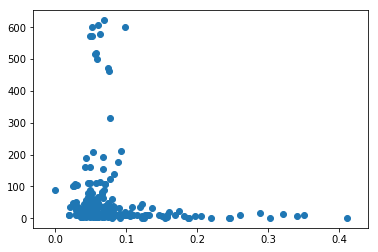

In [14]:
plt.scatter(x = df['Magnitude Error'],y = df['Depth'])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [15]:
df["Depth"].corr(df["Magnitude Error"])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

#### Significa quue há uma correlação muito baixa entre as duas variaveis

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64 count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


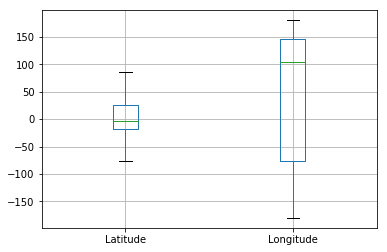

In [13]:
a = df["Latitude"].describe()
b = df["Longitude"].describe()
print(a,b)


df.boxplot(column = ["Latitude","Longitude"])
plt.show()


## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [18]:
df.loc[(df.Type=="Nuclear Explosion")&(df["Magnitude Type"]=="MB")&(df["Hemisferio"]=="Sul"),"h"]="Sul"
df.loc[(df.Type=="Nuclear Explosion")&(df["Magnitude Type"]=="MB")&(df["Hemisferio"]=="Norte"),"h"]="Norte"
sul=df["h"].value_counts("Sul")
sul

Norte    0.828221
Sul      0.171779
Name: h, dtype: float64

##### É mais provável que tenha sido no Norte